In [1]:
!pip install CoolProp

  Using cached CoolProp-6.6.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.3 MB)


In [2]:
from CoolProp.CoolProp import PropsSI

Refrigerant-134a enters the compressor of a refrigerator as superheated vapor at $p_1$ and $T_1$ at a rate of $\dot{m}$ and leaves at $P_2$ and $T_2$. The refrigerant is cooled in the condenser to $T_3$ and $p_3$ and is throttled to $p_4$. We can treat the throttling process as isenthalpic, $h_3 = h_4$. Disregard any heat transfer and pressure drops in the connecting lines between the components. 

Determine:
- (a) the rate of heat removal from the refrigerated space and the power input ot the compressor. 
- (b) the isentropic efficiency of the compressor.
- (c) the coefficient of performance of the refrigerator. 

In [3]:
p1_MPa = 0.14
T1_C = -10
mdot_kgPerS = 0.05
p2_MPa = 0.8
T2_C = 50
p3_MPa = 0.72
T3_C = 26
p4_MPa = 0.15

fluid = 'R134a'


P1 = p1_MPa*1e6
T1 = T1_C + 273.15
P2 = p2_MPa*1e6
T2 = T2_C +273.15
P3 = p3_MPa*1e6
T3 = T3_C + 273.15
P4 = p4_MPa*1e6

In [4]:
h1 = PropsSI('H','P',P1,'T',T1,fluid)
s1 = PropsSI('S','P',P1,'T',T1,fluid)
h2 = PropsSI('H','P',P2,'T',T2,fluid)
s2 = PropsSI('S','P',P2,'T',T2,fluid)
h3 = PropsSI('H','P',P3,'T',T3,fluid)
s3 = PropsSI('S','P',P3,'T',T3,fluid)
h4 = h3
s4 = PropsSI('S','P',P4,'H',h4,fluid)
T4 = PropsSI('T','P',P4,'H',h4,fluid)
Q4 = PropsSI('Q','P',P4,'H',h4,fluid)

s41 = PropsSI('S','P',P4,'Q',1,fluid)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

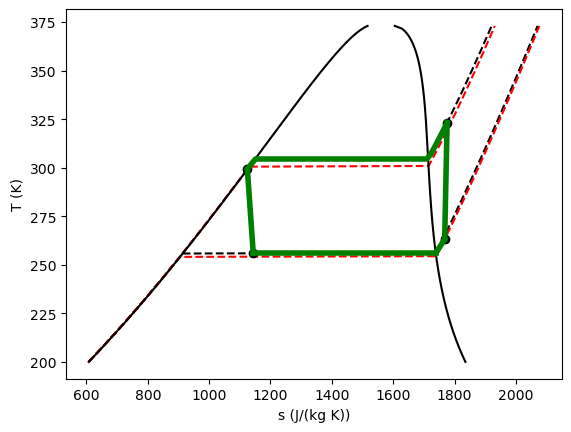

In [23]:
plt.figure()
plt.clf()
T = np.linspace(200, 373, 500) # range of temperatures
for P in [P4,P2]: #MPa
    S = [PropsSI('S','P',P,'T',t,fluid) for t in T]
    plt.plot(S, T, 'k--')

for P in [P1,P3]: #MPa
    S_13 = [PropsSI('S','P',P,'T',t,fluid) for t in T]
    plt.plot(S_13, T, 'r--')

# saturated vapor and liquid entropy lines
svap = [PropsSI('S','T',t,'Q',1,fluid) for t in T]
sliq = [PropsSI('S','T',t,'Q',0,fluid) for t in T]

#sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T]]

plt.plot(svap, T, 'k-')
plt.plot(sliq, T, 'k-')

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')
# plt.savefig('vaporCompression.png')

plt.plot(s1, T1, 'o', color='k')
plt.plot(s2, T2, 'o', color='k')
plt.plot(s3, T3, 'o', color='k')
plt.plot(s4, T4, 'o', color='k')

plt.savefig('vaporCompressionCycleActual-Ts.png')

plt.plot([s1, s2], [T1, T2], 'g-', lw=4) # Path 1 to 2

S23 = np.linspace(s2, s3)
T23 = [PropsSI('T','P',P2,'S',s,'R134a') for s in S23]
plt.plot(S23,T23, 'g-', lw=4)

plt.plot([s3, s4], [T3, T4], 'g-', lw=4) # path from 3 to 4 

T41 = np.linspace(T4, T4) 
Q41 = np.linspace(Q4, 1)
S41 = [PropsSI('S','P',P4,'Q',q,'R134a') for q in Q41]
plt.plot(S41, T41, 'g-', lw=4) # and from 4 to 1 is isobaric

plt.plot([PropsSI('S','P',P4,'Q',1,'R134a'), s1], [T4, T1], 'g-', lw=4) # Path 1 to 2



(a) The rate of heat removal from the refrigerated space and the power input to the compressor are determined from their definitions:
$$\dot{Q}_\text{L} = \dot{m} \left( h_1 - h_4 \right) $$

In [7]:
Qdot_W = mdot_kgPerS * (h1 - h4)
print('The heat removed from the refrigerated space is {0:1.2f} W.'.format(Qdot_W))

The heat removed from the refrigerated space is 7926.42 W.


The power input to the compressor is:

$$ \dot{W}_\text{in} = \dot{m} \left( h_2 - h_1 \right) $$ 

In [8]:
Wdot_W = mdot_kgPerS * (h2 - h1)
print('The power input to the compressor is {0:1.2f} W.'.format(Wdot_W))

The power input to the compressor is 2016.89 W.


The isentropic efficiency of the compressor can be approximated as:

$$\eta \approx \frac{h_{\text{2}s} - h_1}{h_2 - h_1} $$

In [9]:
s2s = s1 # isentropic compressor
h2s = PropsSI('H','P',P2,'S',s2s,fluid)

eta = (h2s - h1)/(h2 - h1)
print(eta)

0.9373666332554036


The coefficient of performance of the refrigerator is then:

$$\text{COP}_\text{R} = \frac{\dot{Q}_\text{L}}{\dot{W}_\text{in}}$$

In [10]:
COP = Qdot_W/Wdot_W
print('The COP is {0:1.2f}.'.format(COP))

The COP is 3.93.
